# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [6]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import matplotlib.pyplot as pt
import seaborn as sns

## load the data sets

In [3]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [4]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [5]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

In [10]:
# Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

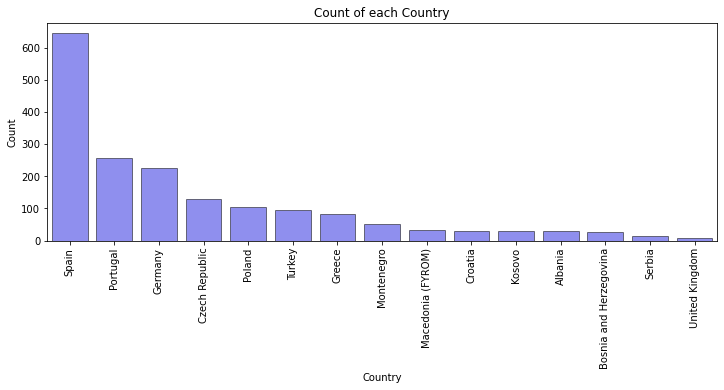

In [76]:
data_1 = df['country'].value_counts() 
# get x and y data 
points = data_1.index 
frequency = data_1.values
pt.figure(figsize=(12, 4))
plot1 = sns.barplot(x = points, y = frequency,color='b',edgecolor = 'black',alpha=0.5)
# set title and labels 
plot1.set_title('Count of each Country') 
plot1.set_xlabel('Country') 
plot1.set_ylabel('Count')
for item in plot1.get_xticklabels():
    item.set_rotation(90)

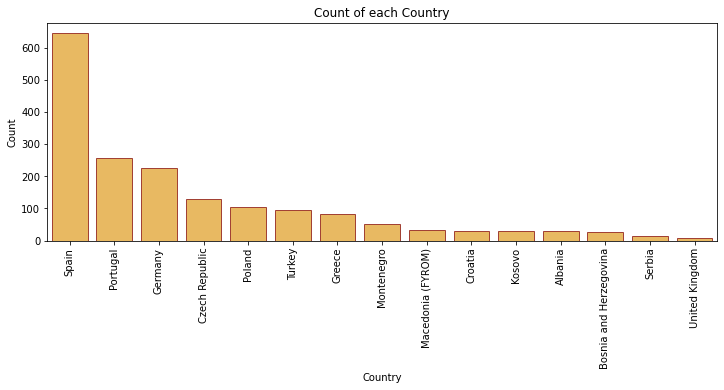

In [77]:
data_1 = df['country'].value_counts() 
# get x and y data 
points = data_1.index 
frequency = data_1.values
pt.figure(figsize=(12, 4))
plot1 = sns.barplot(x = points, y = frequency,color='orange',edgecolor = 'maroon',alpha=0.7)
# set title and labels 
plot1.set_title('Count of each Country') 
plot1.set_xlabel('Country') 
plot1.set_ylabel('Count')
for item in plot1.get_xticklabels():
    item.set_rotation(90)

Now you try: re-create the plot above, but make the bars orange with maroon edges.

In [7]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries

Text(0, 0.5, 'Count')

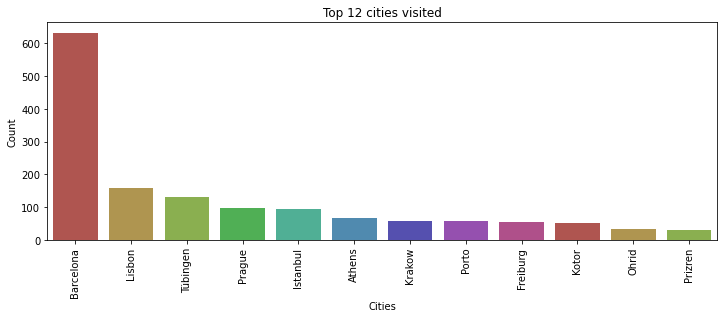

In [113]:
#top 15 visited cities
data_2 = df['city'].value_counts()
data_2 = data_2.head(12)
pt.figure(figsize=(12, 4))
pt.xticks(rotation=90)
#get x and y data 
points = data_2.index 
frequency = data_2.values
plot2 = sns.barplot(x = points, y = frequency,palette=sns.hls_palette(9, l=.5, s=.5))
# set title and labels 
plot2.set_title('Top 12 cities visited') 
plot2.set_xlabel('Cities') 
plot2.set_ylabel('Count')

## Next: scatter plots as simple maps

In [8]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

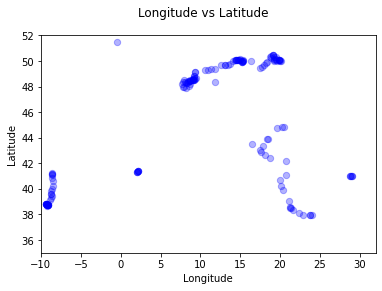

In [100]:
pt.xlim([-10,32])
pt.ylim([35,52])
pt.suptitle('Longitude vs Latitude') 
pt.xlabel('Longitude') 
pt.ylabel('Latitude')
plot3 = pt.scatter(rs["lon"], rs["lat"],color="blue",label="scatter",alpha=0.3,s=40)
pt.show()

## Line charts, with annotation

In [26]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

In [11]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 

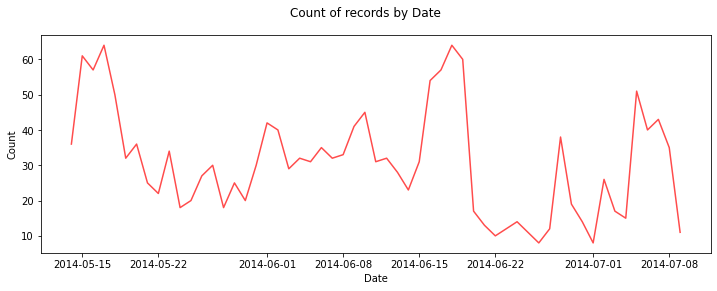

In [103]:
pt.figure(figsize=(12, 4))
pt.suptitle('Count of records by Date') 
pt.xlabel('Date') 
pt.ylabel('Count')
plot4 = pt.plot(countdata,color='r',alpha=0.7)
plot4

In [12]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

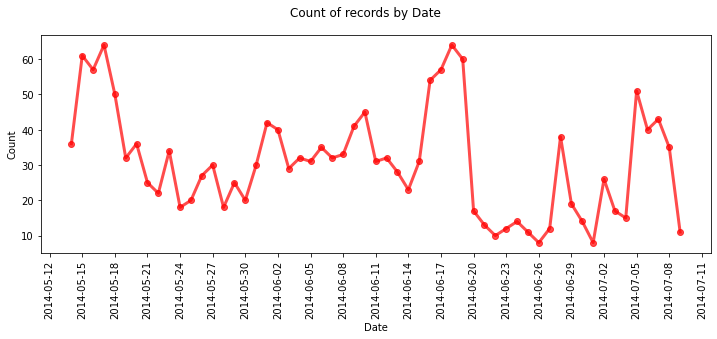

In [151]:
import matplotlib.dates as mdates
pt.figure(figsize=(12, 4))
pt.suptitle('Count of records by Date') 
pt.xlabel('Date') 
pt.ylabel('Count')
plot4 = pt.plot(countdata.index,countdata.values,color='r',alpha=0.7,linewidth=3,marker='o')
ax = pt.gca()

#tick marks 3 days apart
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
for item in ax.get_xticklabels():
    item.set_rotation(90)

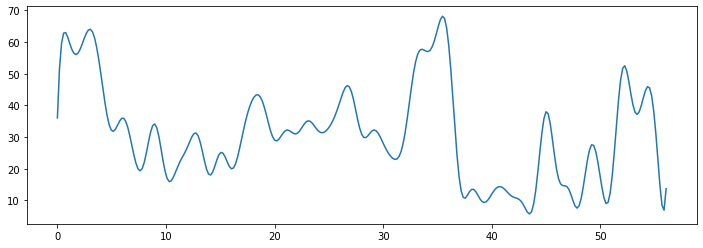

In [188]:
startDate = '2014-05-12'
endDate = '2014-07-11'
index = pd.date_range(startDate, endDate)
data = np.random.normal(0, 1, size=len(index))
cols = ["value"]
#countdata = pd.DataFrame(countdata)
fig, axs = pt.subplots(1, 1, figsize=(12, 4))
x = countdata.index
y = countdata.values
# workaround by creating linespace for length of your x axis
x_new = np.linspace(0, len(countdata.index), 300)
a_BSpline = make_interp_spline(
    [i for i in range(0, len(countdata.index))],
    countdata.values,
    k=5,
)
y_new = a_BSpline(x_new)
# plot this new plot with linestyle = "-"
axs.plot(
    x_new[:-5], # removing last 5 entries to remove noise, because interpolation outputs large values at the end.
    y_new[:-5],
    "-",
    label="interpolated"
)

## Pie charts

In [106]:
cities = df['city'].value_counts()
print(cities.count())
cities

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

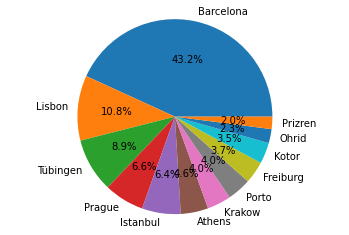

In [155]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 

#only top 12 cities
fig1,ax1 = pt.subplots()
ax1.pie(frequency,  labels =points,autopct='%1.1f%%')
ax1.axis('equal')
pt.show()

<Figure size 864x288 with 0 Axes>

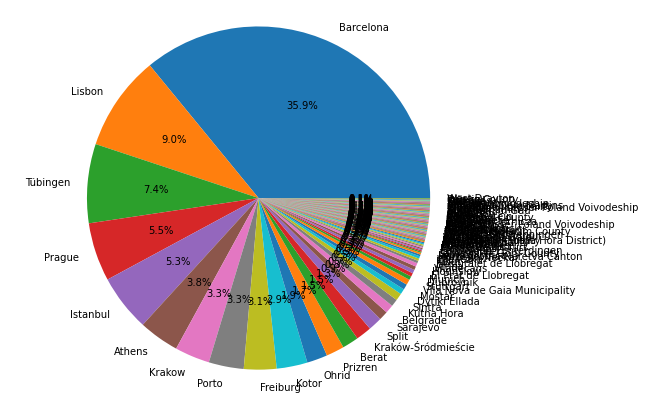

In [160]:
#all cities
pt.figure(figsize=(12, 4))
fig1,ax1 = pt.subplots(figsize=(9, 7))
ax1.pie(cities.values,  labels =cities.index,autopct='%1.1f%%',radius=5000)
ax1.axis('equal')
pt.show()